In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulwajid79","key":"4ec2ad5e4b8383e1e353e2c9ac9365eb"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12          13936        305  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                         22KB  2024-10-06 11:27:38           7353        116  1.0              
yusufdelikkaya/datascience-salaries-2024                     Data Science Salaries 2024                           69KB  2024-10-23 18:39:50           1107         28  0.88235295       
lainguyn123/student-performance-factors                      Student Perfor

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:11<00:00, 238MB/s]
100% 2.29G/2.29G [00:11<00:00, 211MB/s]
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
 99% 657M/663M [00:04<00:00, 178MB/s]
100% 663M/663M [00:04<00:00, 141MB/s]
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
100% 777M/778M [00:07<00:00, 174MB/s]
100% 778M/778M [00:07<00:00, 106MB/s]


In [6]:
import zipfile
import os

datasets = ['chest-xray-pneumonia', 'tuberculosis-tb-chest-xray-dataset', 'covid19-radiography-database']

for dataset in datasets:
  with zipfile.ZipFile(dataset + '.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset)

In [7]:
import glob

# Paths to datasets
pneumonia_data_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray"
tb_data_path = "/content/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
covid_data_path = "/content/covid19-radiography-database/COVID-19_Radiography_Dataset"

# Pneumonia (Normal and Pneumonia classes)
normal_pneumonia = glob.glob(f"{pneumonia_data_path}/train/NORMAL/*.*") + \
                   glob.glob(f"{pneumonia_data_path}/val/NORMAL/*.*") + \
                   glob.glob(f"{pneumonia_data_path}/test/NORMAL/*.*")

pneumonia_images = glob.glob(f"{pneumonia_data_path}/train/PNEUMONIA/*.*") + \
                   glob.glob(f"{pneumonia_data_path}/val/PNEUMONIA/*.*") + \
                   glob.glob(f"{pneumonia_data_path}/test/PNEUMONIA/*.*")

# Tuberculosis (Normal and Tuberculosis classes)
normal_tb = glob.glob(f"{tb_data_path}/Normal/*.*")
tb_images = glob.glob(f"{tb_data_path}/Tuberculosis/*.*")

# COVID-19 (Normal and COVID classes, only 'images' folder)
normal_covid = glob.glob(f"{covid_data_path}/Normal/images/*.*")
covid_images = glob.glob(f"{covid_data_path}/COVID/images/*.*")

# Display counts of each class
print(f"Pneumonia Dataset (Normal): {len(normal_pneumonia)} images")
print(f"Pneumonia Dataset (Pneumonia): {len(pneumonia_images)} images")
print(f"Tuberculosis Dataset (Normal): {len(normal_tb)} images")
print(f"Tuberculosis Dataset (Tuberculosis): {len(tb_images)} images")
print(f"COVID-19 Dataset (Normal): {len(normal_covid)} images")
print(f"COVID-19 Dataset (COVID): {len(covid_images)} images")


Pneumonia Dataset (Normal): 1583 images
Pneumonia Dataset (Pneumonia): 4273 images
Tuberculosis Dataset (Normal): 3500 images
Tuberculosis Dataset (Tuberculosis): 700 images
COVID-19 Dataset (Normal): 10192 images
COVID-19 Dataset (COVID): 3616 images


In [8]:
import os

# Create base directory
base_dir = "/content/chest-xray-fyp"
os.makedirs(base_dir, exist_ok=True)

# Create train and test directories inside base_dir
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Create class directories inside train and test folders
for cls in ['normal', 'pneumonia', 'tuberculosis', 'covid']:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

print(f"Directory structure created at {base_dir}.")


Directory structure created at /content/chest-xray-fyp.


In [9]:
from sklearn.model_selection import train_test_split
import shutil

# Function to copy files to a target directory
def copy_files(file_list, target_dir):
    for file in file_list:
        shutil.copy(file, target_dir)

# Merge all normal images and split into train/test
all_normal_images = normal_pneumonia + normal_tb + normal_covid
train_normal, test_normal = train_test_split(all_normal_images, test_size=0.2, random_state=42)

# Split other disease classes into train/test
train_pneumonia, test_pneumonia = train_test_split(pneumonia_images, test_size=0.2, random_state=42)
train_tb, test_tb = train_test_split(tb_images, test_size=0.2, random_state=42)
train_covid, test_covid = train_test_split(covid_images, test_size=0.2, random_state=42)

# Copy normal class images to respective directories
copy_files(train_normal, os.path.join(train_dir, 'normal'))
copy_files(test_normal, os.path.join(test_dir, 'normal'))

# Copy pneumonia images to respective directories
copy_files(train_pneumonia, os.path.join(train_dir, 'pneumonia'))
copy_files(test_pneumonia, os.path.join(test_dir, 'pneumonia'))

# Copy tuberculosis images to respective directories
copy_files(train_tb, os.path.join(train_dir, 'tuberculosis'))
copy_files(test_tb, os.path.join(test_dir, 'tuberculosis'))

# Copy COVID-19 images to respective directories
copy_files(train_covid, os.path.join(train_dir, 'covid'))
copy_files(test_covid, os.path.join(test_dir, 'covid'))

print("Data split and copied successfully.")


Data split and copied successfully.


In [10]:
# Function to count images in a directory
def count_images_in_dir(dir_path):
    return len(glob.glob(f"{dir_path}/*.*"))

# Verify counts in each class directory (train and test)
for split in ['train', 'test']:
    for cls in ['normal', 'pneumonia', 'tuberculosis', 'covid']:
        cls_dir = os.path.join(base_dir, split, cls)
        print(f"{split.capitalize()} - {cls}: {count_images_in_dir(cls_dir)} images")


Train - normal: 10004 images
Train - pneumonia: 3418 images
Train - tuberculosis: 560 images
Train - covid: 2892 images
Test - normal: 2917 images
Test - pneumonia: 855 images
Test - tuberculosis: 140 images
Test - covid: 724 images


In [11]:
import shutil

# Compress the directory into a zip file
shutil.make_archive("/content/chest-xray-fyp", 'zip', "/content/chest-xray-fyp")
print("Directory zipped successfully.")


Directory zipped successfully.


In [ ]:
#from google.colab import files

# Download the zip file
#files.download("/content/chest-xray-fyp.zip")


#**1. Import Libraries and Setup Paths**

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
# Define the base directory and dataset paths
base_dir = "D:/chest-xray-fyp/Dataset"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Class labels
class_names = ['covid', 'normal', 'pneumonia', 'tuberculosis']


#**2. Exploratory Data Analysis (EDA)**

In [10]:
# Count the number of images in each class for train and test sets
def count_images_in_class(data_dir):
    class_counts = {}
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images_in_class(train_dir)
test_counts = count_images_in_class(test_dir)

print("Training Set Distribution:", train_counts)
print("Test Set Distribution:", test_counts)


Training Set Distribution: {'covid': 2892, 'normal': 4066, 'pneumonia': 3418, 'tuberculosis': 560}
Test Set Distribution: {'covid': 724, 'normal': 1017, 'pneumonia': 855, 'tuberculosis': 140}


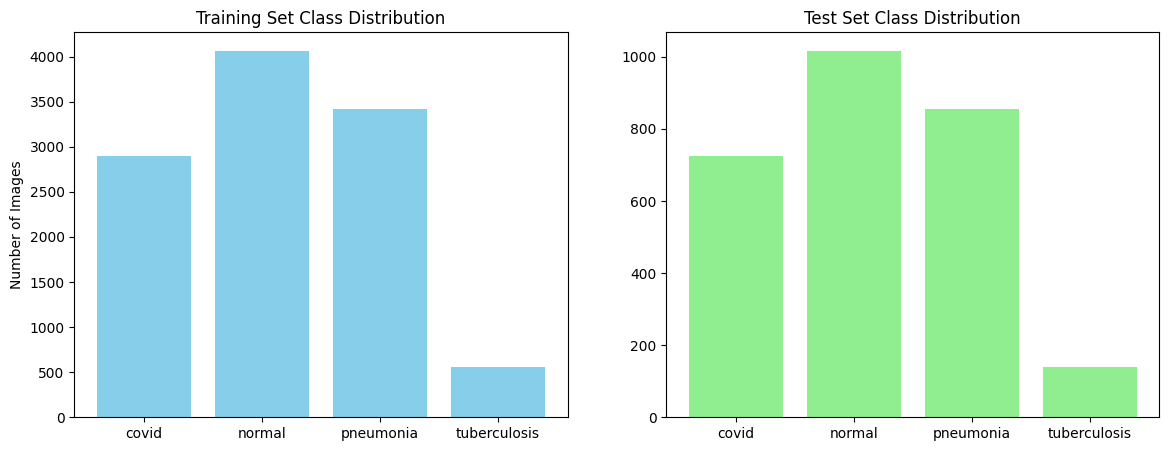

In [11]:
# Plot class distribution for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(train_counts.keys(), train_counts.values(), color='skyblue')
axes[0].set_title('Training Set Class Distribution')
axes[0].set_ylabel('Number of Images')

axes[1].bar(test_counts.keys(), test_counts.values(), color='lightgreen')
axes[1].set_title('Test Set Class Distribution')

plt.show()


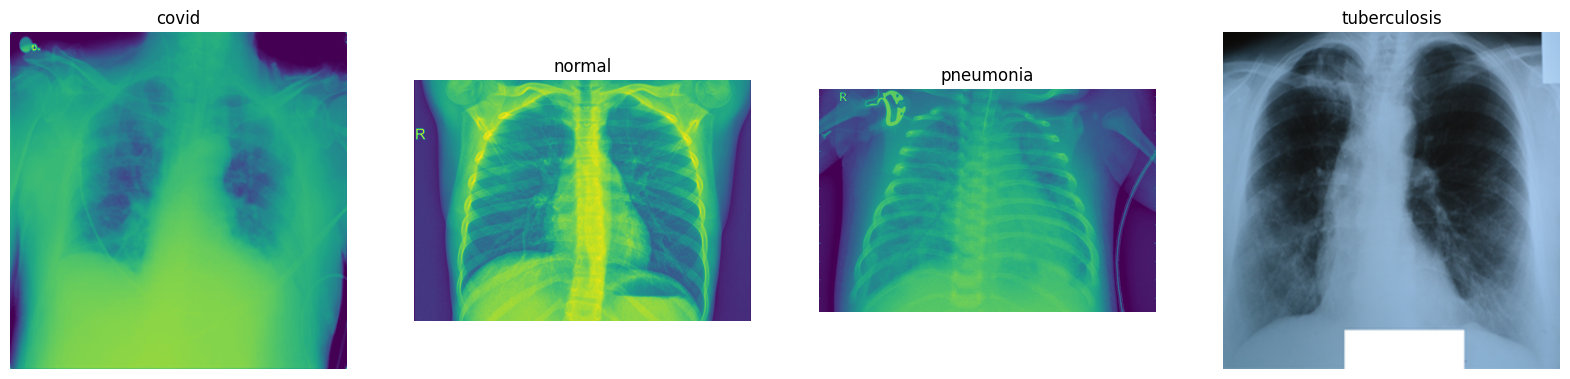

In [12]:
# Helper function to display sample images from each class
def display_sample_images(data_dir, class_name):
    class_path = os.path.join(data_dir, class_name)
    sample_image = Image.open(os.path.join(class_path, os.listdir(class_path)[0]))
    plt.imshow(sample_image)
    plt.axis('off')
    plt.title(class_name)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, class_name in enumerate(class_names):
    plt.subplot(1, 4, i + 1)
    display_sample_images(train_dir, class_name)
plt.show()


# **Adjusting class weight to handle imbalanced data**

In [13]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights based on the training distribution
class_labels = list(train_counts.keys())  # ['normal', 'pneumonia', 'tuberculosis', 'covid']
y_train_labels = [0]*train_counts['normal'] + [1]*train_counts['pneumonia'] + \
                 [2]*train_counts['tuberculosis'] + [3]*train_counts['covid']

# Convert class labels to a NumPy array
classes = np.array([0, 1, 2, 3])

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Computed Class Weights:", class_weights_dict)


Computed Class Weights: {0: 0.6724053123462863, 1: 0.7998829724985371, 2: 4.882142857142857, 3: 0.9453665283540802}


#**3. Data Augmentation and Data Generators**

In [15]:
# Data augmentation for the training set to prevent overfitting
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 10936 images belonging to 4 classes.
Found 2736 images belonging to 4 classes.


#**Step 4: Define Custom CNN and Pre-trained Architectures**

In [16]:
# Custom CNN Model
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
custom_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary
custom_cnn.summary()


c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,372 (42.61 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

def build_model(base_model):
    base_model.trainable = False  # Freeze the base model weights

    # Define input layer matching the pre-trained model's input size
    inputs = Input(shape=(224, 224, 3))

    # Pass inputs through the base model
    x = base_model(inputs, training=False)

    # Add custom layers for classification
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

    # Create the final model
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Load the pre-trained models without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build models
resnet = build_model(resnet_base)
vgg = build_model(vgg_base)
efficientnet = build_model(efficientnet_base)

# Display the summary of one model to verify the architecture
resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 62s 1us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

#**Step 5: Train the Models**

In [18]:
history_cnn = custom_cnn.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)

Epoch 1/10


c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


342/342 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.5138 - loss: 9.3328 - val_accuracy: 0.4203 - val_loss: 1.8754
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.4807 - loss: 2.2831 - val_accuracy: 0.5219 - val_loss: 0.9055
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.4867 - loss: 1.3487 - val_accuracy: 0.5139 - val_loss: 1.6609
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.4873 - loss: 1.0531 - val_accuracy: 0.0515 - val_loss: 355.9396
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 461s 1s/step - accuracy: 0.4893 - loss: 1.1949 - val_accuracy: 0.3914 - val_loss: 82.5223
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - accuracy: 0.5146 - loss: 1.1366 - val_accuracy: 0.4737 - val_loss: 1.5771
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.5108 - loss: 0.9071 - val_accuracy: 0.1093 - val_loss: 214.0332
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.5473 - loss: 0.9296 - val_accuracy: 

In [ ]:
history_resnet = resnet.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)


In [ ]:
history_vgg = vgg.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


527/527 ━━━━━━━━━━━━━━━━━━━━ 355s 640ms/step - accuracy: 0.6492 - loss: 0.8782 - val_accuracy: 0.7639 - val_loss: 0.5513
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 337s 581ms/step - accuracy: 0.7923 - loss: 0.5482 - val_accuracy: 0.8383 - val_loss: 0.4182
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 308s 556ms/step - accuracy: 0.8167 - loss: 0.4781 - val_accuracy: 0.8638 - val_loss: 0.3614
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 335s 579ms/step - accuracy: 0.8297 - loss: 0.4466 - val_accuracy: 0.8651 - val_loss: 0.3530
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 309s 555ms/step - accuracy: 0.8384 - loss: 0.4295 - val_accuracy: 0.8750 - val_loss: 0.3245
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 295s 554ms/step - accuracy: 0.8515 - loss: 0.3930 - val_accuracy: 0.8735 - val_loss: 0.3242
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 297s 557ms/step - accuracy: 0.8454 - loss: 0.3914 - val_accuracy: 0.8696 - val_loss: 0.3413
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 320s 555ms/step - accuracy: 0.8546 - loss: 0.38

In [ ]:
history_efficientnet = efficientnet.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)


Epoch 1/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 326s 567ms/step - accuracy: 0.5890 - loss: 1.0803 - val_accuracy: 0.6283 - val_loss: 1.0084
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 283s 521ms/step - accuracy: 0.5865 - loss: 1.0720 - val_accuracy: 0.6283 - val_loss: 1.0017
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 277s 520ms/step - accuracy: 0.5957 - loss: 1.0528 - val_accuracy: 0.6283 - val_loss: 1.0083
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 296s 554ms/step - accuracy: 0.5930 - loss: 1.0605 - val_accuracy: 0.6283 - val_loss: 1.0032
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 303s 517ms/step - accuracy: 0.5963 - loss: 1.0540 - val_accuracy: 0.6283 - val_loss: 1.0016
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 279s 522ms/step - accuracy: 0.5933 - loss: 1.0538 - val_accuracy: 0.6283 - val_loss: 1.0038
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 279s 523ms/step - accuracy: 0.5889 - loss: 1.0602 - val_accuracy: 0.6283 - val_loss: 1.0046
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 321s 522ms/step - accuracy: 0.5946 -

#**Step 6: Evaluate Models and Compare Performance**

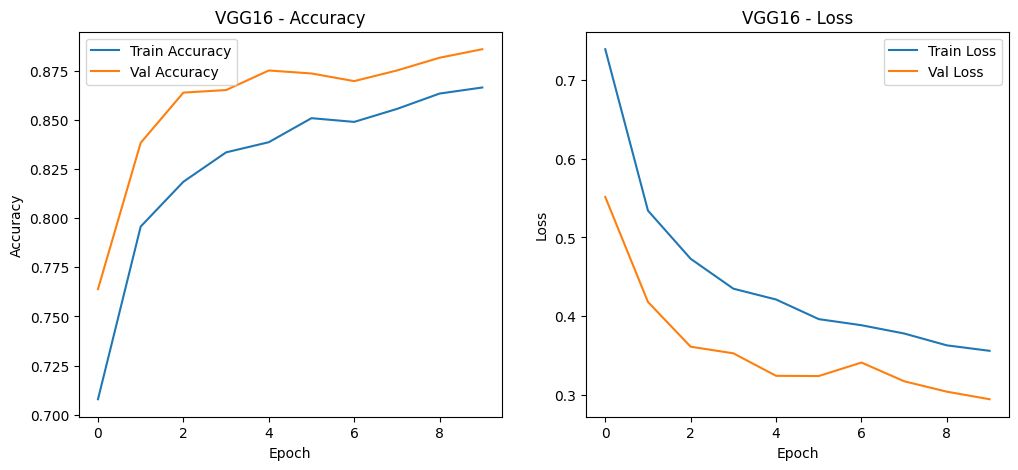

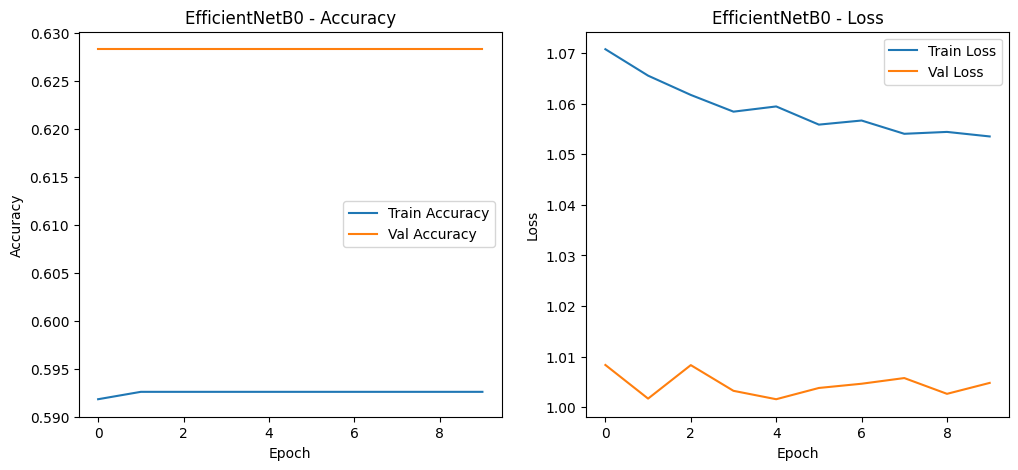

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#plot_history(history_cnn, "Custom CNN")
#plot_history(history_resnet, "ResNet50")
plot_history(history_vgg, "VGG16")
plot_history(history_efficientnet, "EfficientNetB0")


In [ ]:
def evaluate_model(model, name):
    loss, accuracy = model.evaluate(test_generator)
    print(f'{name} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

#evaluate_model(custom_cnn, "Custom CNN")
#evaluate_model(resnet, "ResNet50")
evaluate_model(vgg, "VGG16")
evaluate_model(efficientnet, "EfficientNetB0")


145/145 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.7959 - loss: 0.4813
VGG16 - Test Loss: 0.2948, Test Accuracy: 0.8858
145/145 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.5313 - loss: 1.1019
EfficientNetB0 - Test Loss: 1.0048, Test Accuracy: 0.6283


145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 251ms/step
Classification Report for VGG16:
               precision    recall  f1-score   support

      normal       0.91      0.56      0.69       724
   pneumonia       0.87      0.98      0.92      2906
tuberculosis       0.95      0.87      0.91       855
       covid       0.91      0.70      0.79       140

    accuracy                           0.89      4625
   macro avg       0.91      0.78      0.83      4625
weighted avg       0.89      0.89      0.88      4625



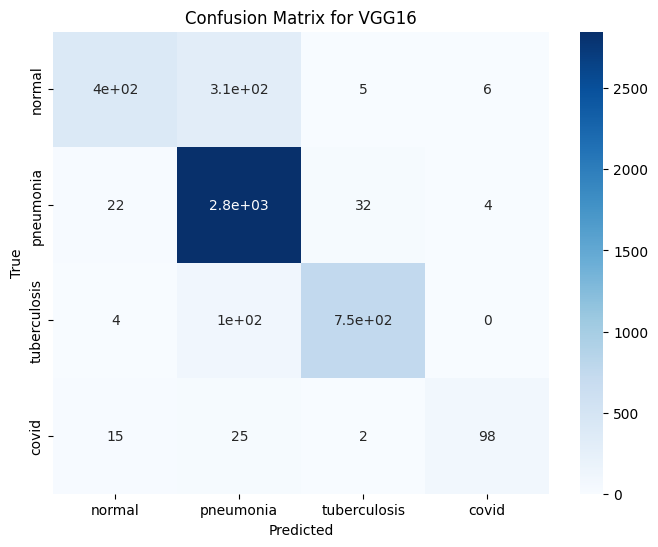

145/145 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step
Classification Report for EfficientNetB0:
               precision    recall  f1-score   support

      normal       0.00      0.00      0.00       724
   pneumonia       0.63      1.00      0.77      2906
tuberculosis       0.00      0.00      0.00       855
       covid       0.00      0.00      0.00       140

    accuracy                           0.63      4625
   macro avg       0.16      0.25      0.19      4625
weighted avg       0.39      0.63      0.48      4625



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


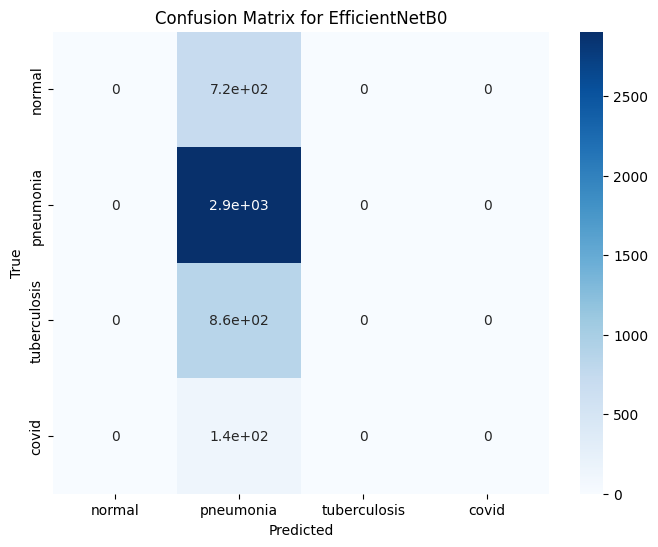

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def classification_metrics(model, name):
    y_pred = np.argmax(model.predict(test_generator), axis=1)
    y_true = test_generator.classes

    print(f"Classification Report for {name}:\n", classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

#classification_metrics(custom_cnn, "Custom CNN")
#classification_metrics(resnet, "ResNet50")
classification_metrics(vgg, "VGG16")
classification_metrics(efficientnet, "EfficientNetB0")


#**Step 7: Choose the Best Model Based on Performance**

In [ ]:
# Choose the model with the highest test accuracy or best classification report
model_accuracies = {
    "Custom CNN": custom_cnn.evaluate(test_generator)[1],
    "ResNet50": resnet.evaluate(test_generator)[1],
    "VGG16": vgg.evaluate(test_generator)[1],
    "EfficientNetB0": efficientnet.evaluate(test_generator)[1]
}

best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model_name} with accuracy: {model_accuracies[best_model_name]:.4f}")


#**Step 8: Save the Best Model**

In [ ]:
# Save the best model
best_model = {
    "Custom CNN": custom_cnn,
    "ResNet50": resnet,
    "VGG16": vgg,
    "EfficientNetB0": efficientnet
}[best_model_name]

best_model.save(f'{best_model_name}_model.h5')
print(f"Best model ({best_model_name}) saved as '{best_model_name}_model.h5'")


#**Step 9: Predict on New Images Using the Best Model**

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model(f'{best_model_name}_model.h5')

def predict_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = np.argmax(loaded_model.predict(img), axis=1)[0]
    print(f"Predicted Class: {class_names[prediction]}")

# Test with a sample image (replace with actual path)
sample_image_path = "/content/chest-xray-fyp/test/COVID/any_image.jpg"
predict_image(sample_image_path)
